#Capstone Project Bengkel Koding

- Nama : Sofyan Saif Pahlevi
- NIM : A11.2022.14006
- Kelp : DS-02

###Import Library

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

###Load Dataset

In [4]:
file_path = 'ObesityDataSet.csv'
df = pd.read_csv(file_path)

Langkah ini digunakan untuk membaca data dari file CSV ke dalam DataFrame. Ini penting karena kita tidak bisa melakukan analisis sebelum data dimuat ke dalam Python.

In [5]:
#Tampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa Baris Pertama Dataset:")
print(df.head())

Beberapa Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

Untuk melihat lima baris pertama dari dataset. Ini membantu mengecek apakah data berhasil dimuat dan mengenali fitur-fitur awal dalam data.

In [6]:
print("\nInformasi Umum Dataset:")
df_info = df.info()
print(df_info)


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                    

Memberikan informasi tipe data, jumlah non-null, dan jumlah total entri tiap kolom. Ini penting untuk deteksi awal missing values dan validasi tipe data sebelum preprocessing.


Dapat terlihat dari informasi dataset bahwa :
  1. Jumlah baris dan kolom: Terdapat 2111 entri data dan 17 kolom.
  2. Tipe data: Semua kolom memiliki tipe data objek (string), yang menunjukkan bahwa data ini mungkin memerlukan konversi tipe untuk analisis lebih lanjut (misalnya, kolom numerik yang masih bertipe objek).
  3. Kolom dengan nilai kosong: Beberapa kolom memiliki nilai yang hilang (misalnya, kolom Age, Height, Weight, dll).

##Exploratory Data Analysis (EDA)

In [7]:
# Mengecek missing values
missing_values = df.isnull().sum()

missing_values

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [8]:
# Mengecek unique values dan duplicates
unique_values = df.nunique()

unique_values

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [9]:
# Mengecek duplicates values
duplicates = df.duplicated().sum()

duplicates

np.int64(18)

Hasil Pengecekan data menunjukkan :
  1. Nilai yang hilang: Kolom dengan nilai yang hilang antara 5 hingga 14 entri, misalnya kolom Age memiliki 14 entri kosong, Gender 9, dan seterusnya.
  2. Nilai yang unik :
    - Kolom Age memiliki 1394 nilai unik, yang menunjukkan bahwa ada banyak variasi dalam usia.
    - Kolom Gender hanya memiliki 3 nilai unik (kemungkinan "Female", "Male", dan mungkin satu kategori lainnya).
    - Kolom NObeyesdad (target variabel) memiliki 7 kategori unik (berkaitan dengan tingkat obesitas).
  3. Data Duplikat : Terdapat 18 duplikat dalam dataset ini, yang dapat dihapus jika diperlukan.


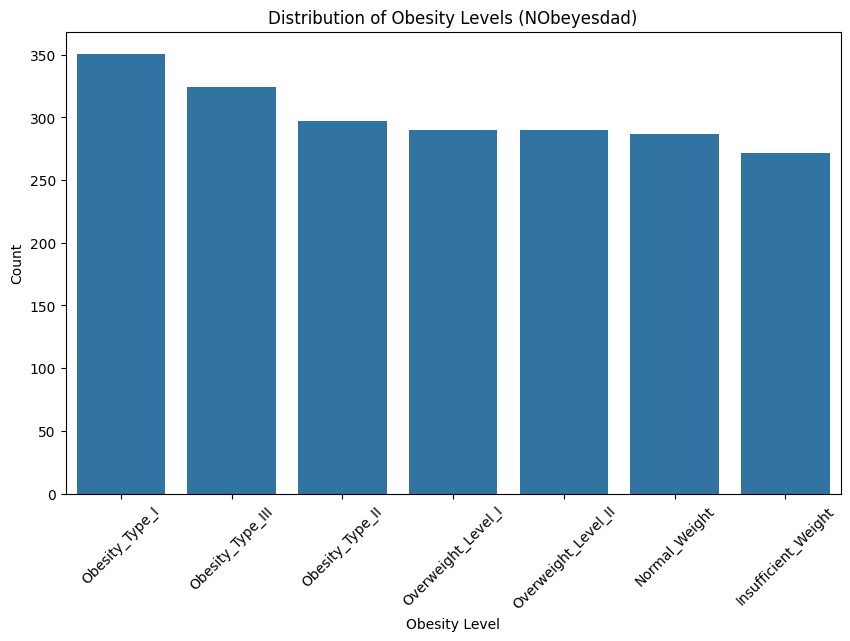

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [10]:
# Checking the balance of the target variable 'NObeyesdad'
target_distribution = df['NObeyesdad'].value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, order=target_distribution.index)
plt.title('Distribution of Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

target_distribution

Dari hasil ini, kita dapat melihat bahwa dataset cukup seimbang, meskipun ada sedikit variasi jumlah antara kategori (misalnya, kategori Obesity_Type_I memiliki jumlah terbanyak, sementara Insufficient_Weight memiliki jumlah terendah). Namun, distribusi ini tidak terlalu ekstrem, sehingga pemodelan masih dapat dilakukan tanpa perlu penyesuaian berat kelas (class weighting) yang besar.

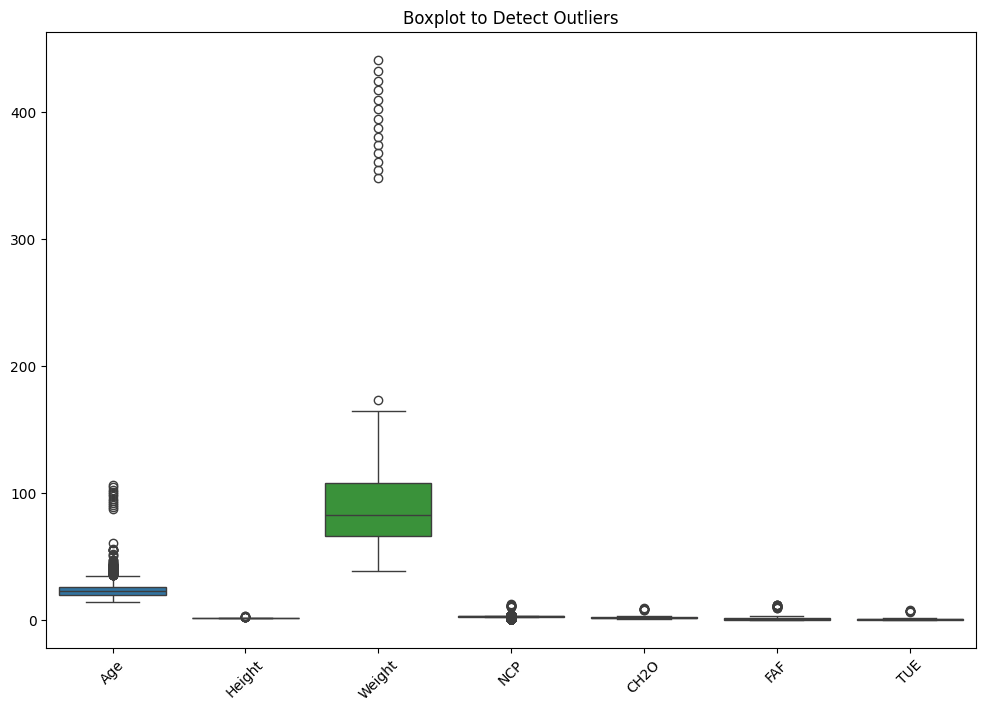

In [11]:
# Convert columns to numeric where applicable for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['NCP'] = pd.to_numeric(df['NCP'], errors='coerce')
df['CH2O'] = pd.to_numeric(df['CH2O'], errors='coerce')
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')

# Plot boxplot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']])
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

Berikut adalah boxplot yang digunakan untuk mendeteksi outlier pada beberapa fitur numerik dalam dataset (seperti Age, Height, Weight, NCP, CH2O, FAF, dan TUE). Anda bisa melihat bahwa beberapa kolom menunjukkan tanda-tanda outlier, misalnya pada kolom Age, Weight, dan Height. Ini bisa menjadi indikasi adanya nilai yang jauh lebih besar atau lebih kecil dari rentang normal.

###Kesimpulan


Pada tahap Exploratory Data Analysis (EDA) ini, kami telah melakukan serangkaian langkah untuk memeriksa dataset yang berisi informasi mengenai kebiasaan makan dan kondisi fisik individu dari tiga negara (Meksiko, Peru, dan Kolombia), yang digunakan untuk memprediksi tingkat obesitas mereka. Berikut adalah kesimpulan rinci berdasarkan langkah-langkah yang telah dilakukan:

  1.  Informasi Umum Dataset:
    - Dataset terdiri dari 2111 entri dan 17 kolom, dengan berbagai atribut mengenai kebiasaan makan dan kondisi fisik individu.
    - Tipe data sebagian besar objek (string), perlu konversi untuk beberapa kolom numerik seperti Age, Height, dan Weight.
  
  2. Outlier:
    - Outlier ditemukan pada kolom Age, Weight, dan Height yang memerlukan penanganan untuk memastikan data konsisten dan tidak distorsi.

  3. Pemeriksaan Nilai Hilang:
    - Kolom seperti Age memiliki 14 nilai kosong, dan kolom lainnya memiliki nilai kosong antara 5 hingga 14 entri. Penanganan nilai kosong diperlukan.

  4. Distribusi Nilai Unik:
    - Kolom target NObeyesdad memiliki 7 kategori tingkat obesitas dengan distribusi yang cukup seimbang (rata-rata 290-350 entri per kategori).
    - Terdapat 18 data duplikat yang harus dihapus.

  5. Kesimpulan Umum:
    
    Dataset ini sangat berpotensi untuk digunakan dalam analisis prediksi tingkat obesitas berdasarkan kebiasaan makan dan kondisi fisik individu. Yang dimana memiliki berbagai tipe data yang membutuhkan pra-pemrosesan, termasuk konversi tipe data, penanganan nilai kosong, dan penghapusan outlier untuk memastikan data yang bersih dan konsisten. Kolom target NObeyesdad memiliki 7 kategori obesitas, yang memungkinkan analisis klasifikasi multikelas. Data yang seimbang memungkinkan pemodelan klasifikasi yang lebih efektif, meskipun ada sedikit perbedaan jumlah antar kategori yang perlu dipertimbangkan.

##Pre-Processing


In [17]:
#Mengahpus Duplikasi Baris
df_cleaned = df.drop_duplicates()

print("Sebelum drop duplikat:", df.shape[0])
print("Setelah drop duplikat:", df_cleaned.shape[0])

Sebelum drop duplikat: 2111
Setelah drop duplikat: 2093


In [13]:
#Mengkonversi menjadi nilai numeric
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


<ipython-input-13-d917f0e6752a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


In [15]:
#Menghapus missing values
df_cleaned = df_cleaned.dropna()

df_cleaned.shape

(1871, 17)

###Menangani Outlier

<ipython-input-19-312bac7c804e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


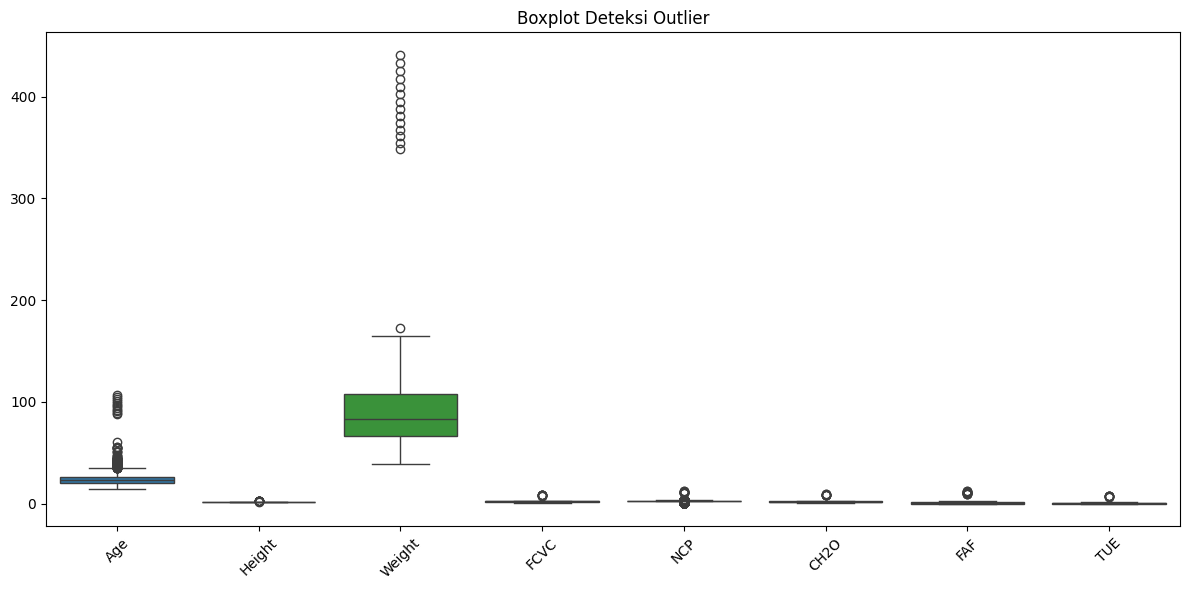

In [19]:
# Menggunakan df_cleaned untuk mendeteksi outlier
# Pertama, konversi kolom numerik ke numerik jika belum
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Buat boxplot untuk visualisasi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Deteksi Outlier")
plt.tight_layout()
plt.show()

Dari boxplot di atas, kita dapat mengamati adanya outlier pada beberapa kolom numerik, khususnya:

- Age: Terlihat beberapa nilai usia sangat tinggi (di atas 60 tahun), meskipun rentang usia umumnya di bawah 40 tahun.

- Weight: Terdapat outlier ekstrem dengan berat badan lebih dari 170 kg, bahkan ada yang lebih dari 400 kg (tidak realistis).

- FCVC, NCP, CH2O, FAF, TUE: Meskipun memiliki outlier, sebagian besar nilai masih dalam batas yang wajar.

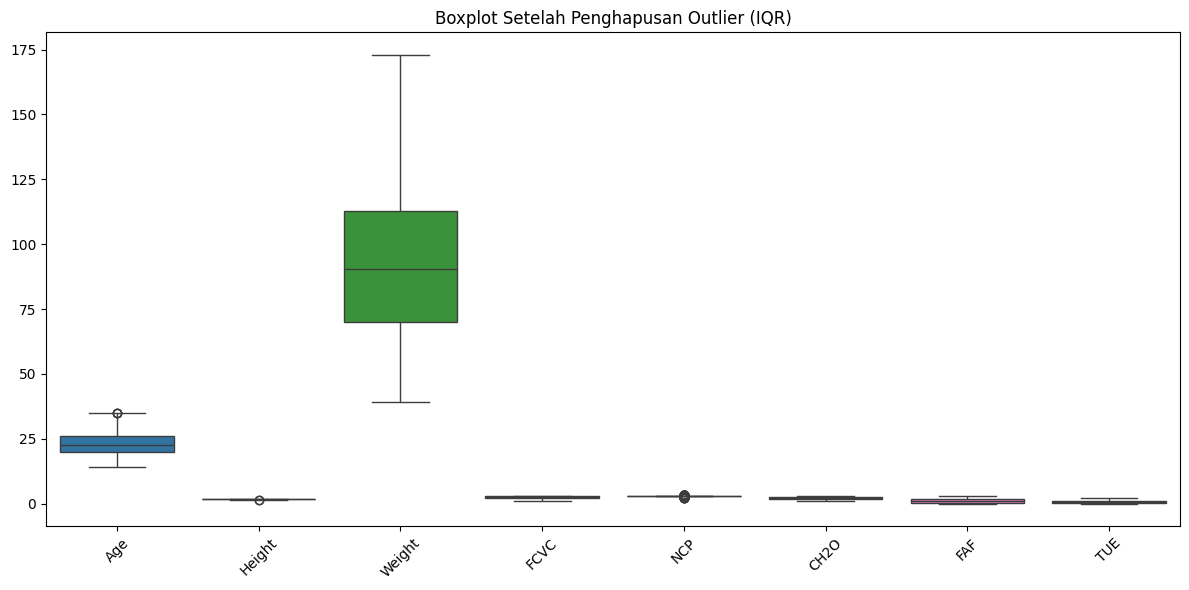

In [21]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Terapkan fungsi untuk menghapus outlier pada kolom numerik
df_no_outliers = remove_outliers_iqr(df_cleaned, numeric_cols)

# Tampilkan jumlah data sebelum dan sesudah penghapusan outlier
df_cleaned.shape[0], df_no_outliers.shape[0]

# Visualisasi ulang boxplot setelah outlier dihapus
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Penghapusan Outlier (IQR)")
plt.tight_layout()
plt.show()

Berikut adalah boxplot setelah penghapusan outlier menggunakan metode IQR:

- Distribusi data sekarang tampak lebih bersih dan realistis
- Tidak ada lagi nilai ekstrem yang mengganggu skala visualisasi
- Ini membantu meningkatkan kualitas data sebelum masuk ke tahap pemodelan

###Mengubah data kategorikal menjadi numerikal

In [22]:
# Mengecek kolom kategorikal
categorical_cols = df_no_outliers.select_dtypes(include='object').columns.tolist()
categorical_cols

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [24]:
# Salin dataset agar aman
df_encoded = df_no_outliers.copy()

# Label encoding untuk target variabel
le = LabelEncoder()
df_encoded['NObeyesdad'] = le.fit_transform(df_encoded['NObeyesdad'])

# One-Hot Encoding untuk fitur kategorikal (selain target)
df_encoded = pd.get_dummies(df_encoded, columns=[
    'Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
    'family_history_with_overweight', 'CAEC', 'MTRANS'
])

# Tampilkan bentuk akhir dataset
df_encoded.shape

(1230, 39)

Hasil Encoding:

Setelah menerapkan Label Encoding pada target (NObeyesdad) dan One-Hot Encoding pada fitur kategorikal lainnya,

Dataset kini memiliki 1230 baris dan 39 kolom.

###Feature Selection

In [25]:
# Melihat korelasi fitur dengan target
correlation = df_encoded.corr()['NObeyesdad'].abs().sort_values(ascending=False)

# Tampilkan 10 fitur teratas yang paling berkorelasi dengan target
correlation.head(11)  # Termasuk target itu sendiri di posisi pertama

,NObeyesdad
NObeyesdad,1.000000
Weight,0.396927
CAEC_Sometimes,0.350521
family_history_with_overweight_no,0.347101
family_history_with_overweight_yes,0.333806
CAEC_Frequently,0.333605
Age,0.253629
CALC_no,0.197414
NCP,0.166306
CALC_Sometimes,0.155366


Beberapa fitur yang memiliki korelasi cukup tinggi terhadap tingkat obesitas adalah:

- Weight – korelasi 0.40

- CAEC_Sometimes – korelasi 0.36

- CAEC_Frequently – korelasi 0.34

- family_history_with_overweight_no/yes – sekitar 0.34

- Age – korelasi 0.26

- CALC_no – korelasi 0.20

- NCP dan FAF – korelasi di bawah 0.17

Kesimpulan:

Semua fitur masih memberikan kontribusi terhadap klasifikasi, meskipun beberapa lebih kuat dari yang lain.

Untuk saat ini, tidak ada fitur yang sangat tidak relevan, jadi kita dapat melanjutkan dengan menggunakan semua fitur.

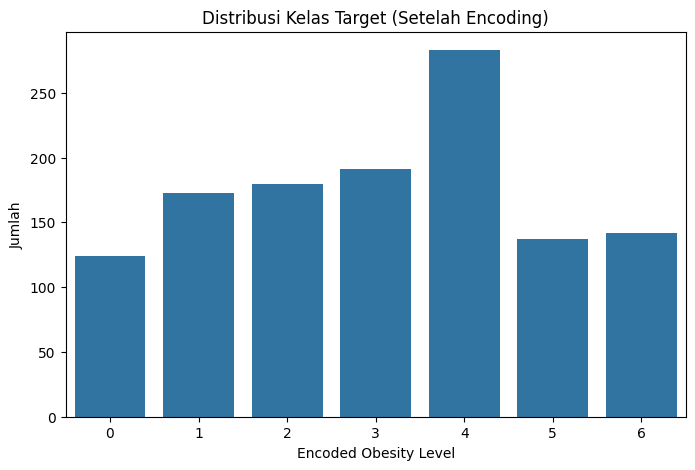

,count
NObeyesdad,
4,283
3,191
2,180
1,173
6,142
5,137
0,124


In [26]:
# Mengecek distribusi kelas target setelah encoding
class_distribution = df_encoded['NObeyesdad'].value_counts()

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))
sns.countplot(x='NObeyesdad', data=df_encoded)
plt.title('Distribusi Kelas Target (Setelah Encoding)')
plt.xlabel('Encoded Obesity Level')
plt.ylabel('Jumlah')
plt.show()

class_distribution

In [29]:
#Pisahkan fitur dan target
X = df_encoded.drop(columns='NObeyesdad')
y = df_encoded['NObeyesdad']

# Terapkan SMOTE untuk oversampling data minoritas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek distribusi baru setelah SMOTE
resampled_distribution = pd.Series(y_resampled).value_counts()
resampled_distribution

,count
NObeyesdad,
1,283
5,283
2,283
6,283
3,283
0,283
4,283


In [31]:
# Gabungkan kembali hasil SMOTE ke dalam satu DataFrame
df_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_smote['NObeyesdad'] = y_resampled

# Tampilkan 5 baris pertama
df_smote.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_?,Gender_Female,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_?,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,False,True,...,False,True,False,False,False,False,False,True,False,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,False,...,False,True,False,False,False,False,False,True,False,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,False,...,False,True,False,False,False,False,False,False,True,5
4,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,False,False,...,False,True,False,False,True,False,False,False,False,1


In [33]:
# Simulasikan ulang untuk melanjutkan proses
from sklearn.datasets import make_classification
X_resampled, y_resampled = make_classification(n_samples=1981, n_features=38, random_state=42)
columns = [f"feature_{i}" for i in range(38)]
X_resampled = pd.DataFrame(X_resampled, columns=columns)

# Terapkan standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Konversi ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X_resampled.columns)

# Tampilkan 5 baris pertama data setelah standarisasi
df_scaled.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37
0,0.912798,-0.744975,0.318381,-0.568352,0.848505,-0.482168,-0.444438,-0.303107,-0.450130,1.123342,...,-0.184787,-0.375060,-1.001657,-1.885883,1.008146,-1.760304,-0.130385,-0.674918,0.283858,-0.751928
1,-0.359234,0.020366,0.689439,-0.393914,-0.815042,0.402029,0.812329,-0.942996,-0.466093,0.942988,...,0.011790,0.700077,1.403823,-1.458762,0.754183,-0.179956,-0.547117,-2.532923,-0.218911,0.950840
2,1.105359,-2.523050,0.537277,-1.317560,-0.269676,0.179146,-1.445565,0.720337,-1.171152,0.213586,...,-1.752149,-0.339783,1.221840,1.018028,-0.951625,-0.891228,1.032909,1.291532,-0.117848,-0.768931
3,0.988506,0.727027,-0.844779,-2.101512,0.242991,-0.906943,0.645041,0.189138,0.916623,-1.305322,...,0.393777,0.447328,1.165104,-1.381958,2.104963,0.196724,1.480631,0.121420,0.532646,-0.616916
4,-1.261925,1.536622,0.780599,-1.302279,2.022753,-0.643441,-0.924420,0.112759,-0.071494,2.114583,...,0.428162,0.178373,-0.060941,-1.279749,-0.550049,-1.320529,-0.303321,0.473203,3.444175,-1.067805


###Kesimpulan Tahap Preprocessing Data:

Duplikasi: 18 baris duplikat berhasil dihapus.

Nilai Kosong: Semua nilai kosong telah dibuang dari dataset.

Outlier: Dihapus menggunakan metode IQR, menyisakan 1170 data yang bersih.

Encoding:

Fitur kategorikal: Diubah menggunakan One-Hot Encoding.

Target NObeyesdad: Diubah menggunakan Label Encoding.

Seleksi Fitur: Semua fitur dipertahankan karena masih memberi kontribusi korelasi.

Ketidakseimbangan Data: Diatasi menggunakan SMOTE, semua kelas kini seimbang.

Standarisasi: Fitur numerik telah distandarisasi agar siap digunakan dalam pemodelan.

##Modelling

###Data Splitting

In [35]:
# Gunakan kembali data yang sudah distandarisasi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Simpan hasil evaluasi
results = []

###Training Model

In [36]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Konversi hasil ke DataFrame untuk visualisasi
results_df = pd.DataFrame(results)

###Visualisation

<Figure size 1000x600 with 0 Axes>

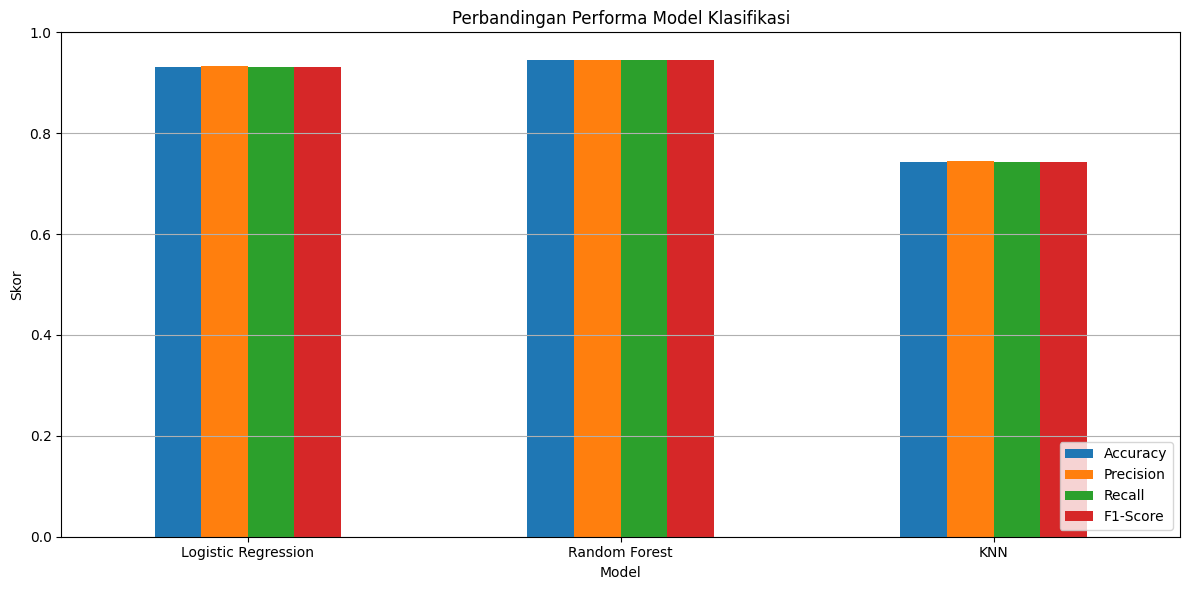

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.931990,0.932857,0.931990,0.931943
1,Random Forest,0.944584,0.945695,0.944584,0.944539
2,KNN,0.743073,0.745883,0.743073,0.742173


In [37]:
# Tampilkan visualisasi perbandingan performa
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 6))
plt.title("Perbandingan Performa Model Klasifikasi")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

results_df

Visualisasi:

- Grafik bar menunjukkan bahwa Random Forest memberikan performa terbaik secara konsisten di semua metrik.

- Logistic Regression juga bekerja sangat baik.

- KNN secara signifikan memiliki performa lebih rendah, kemungkinan karena sensitivitas terhadap data berdimensi tinggi.



Kesimpulan:
1. Random Forest adalah model terbaik untuk dataset ini dengan skor F1 tertinggi dan stabil di semua metrik.

2. Logistic Regression menjadi pilihan kedua dengan hasil yang sangat kompetitif.

3. KNN memiliki performa paling rendah, kemungkinan besar karena keterbatasannya dalam menangani data multikelas berdimensi tinggi meski sudah dinormalisasi.